In [1]:
import os
from copy import deepcopy

from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from Environment import Environment, make_one_hot, give_mapping
from Agent import Agent

In [2]:
def give_prev_steps(prev_steps_assist, steps):
    prev_steps_assist = [[0,0,0,0,-1,-1] for i in range(steps-1)]
    return prev_steps_assist

In [3]:
N = 20
batch_size = 5
n_epochs = 4
alpha = 0.0005
memory_len = 6

agent = Agent(gamma=0.99, alpha=alpha, gae_lambda=0.95, policy_clip=0.1,\
              batch_size=batch_size, N=N, n_epochs=n_epochs, memory_len = memory_len)


n_games = 15000
best_reached = 0
score_history = []

learn_iters = 0
avg_score = 0
n_steps = 0
max_steps = 40
reached = 0

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 2)]          0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 2)]          0           input_1[0][0]                    
__________________________________________________________________________________________________
subtract (Subtract)             (None, 2)            0           tf_op_layer_strided_slice[0][0]  
                                                                 tf_op_layer_strided_sl

In [4]:
for i in tqdm(range(n_games)):
    env = Environment(num_icons = np.random.randint(low = 3, high = 30))
    env_cell_mapping = give_mapping(env.cells)
    layout = env_cell_mapping[np.newaxis, :, :, np.newaxis]
    done = False
    episode_reward = 0
    start, dest = env.give_start_dest()
    user_state = [start[0], start[1], dest[0], dest[1]]
    prev_steps_assist = []
    prev_steps_assist = give_prev_steps(prev_steps_assist, memory_len)
    step = 0
    episode_reward = 0
    curr_loc = user_state[:2]
    target_loc = user_state[2:]
    
    while not done and step<max_steps:
        step+=1
        n_steps+=1
        user_action, user_prob, asst_action, asst_prob, vals, asst_state, asst_output_one_hot\
        = agent.choose_action(user_state, layout, prev_steps_assist, test = False)
        
        
        new_loc, reward, _, done = env.step(user_action, asst_action + 1, target_loc, curr_loc)
        
        if done:
            reached+=1
        
        agent.remember(user_state, asst_state, layout, asst_output_one_hot,\
                       user_action, user_prob, asst_action, asst_prob, vals, reward, done)
         
        user_state = new_loc + target_loc
        prev_steps_assist = asst_state[1:]
        curr_loc = new_loc
        episode_reward+=reward
        
        if n_steps%N==0:
            agent.learn()
            learn_iters+=1
            
    score_history.append(episode_reward)
    avg_score = np.mean(score_history[-100:])
    
    if i%100==0:
        if max_steps>10:
            max_steps-=2
            max_steps = max(max_steps, 10)
            
        elif i%500==0:
            max_steps-=1
            max_steps = max(max_steps, 6)
    
    if i%100==0:
        print(f'Episode: {i}; Score: {episode_reward}; Avg_score: {avg_score}; Timesteps: {n_steps}; Learning Steps: {learn_iters}; Reached: {reached}')
        
        if reached>=best_reached:
            best_reached = min(reached, 90)
            agent.save_models()
            
        reached = 0
        


  0%|                                                                             | 1/15000 [00:03<14:04:44,  3.38s/it]

Episode: 0; Score: -40; Avg_score: -40.0; Timesteps: 40; Learning Steps: 2; Reached: 0
Saving Models


  1%|▌                                                                           | 101/15000 [02:55<8:22:13,  2.02s/it]

Episode: 100; Score: -38; Avg_score: -28.17; Timesteps: 3198; Learning Steps: 159; Reached: 31
Saving Models


  1%|█                                                                           | 201/15000 [05:05<3:46:17,  1.09it/s]

Episode: 200; Score: 0; Avg_score: -9.92; Timesteps: 5070; Learning Steps: 253; Reached: 80
Saving Models


  2%|█▌                                                                          | 301/15000 [06:22<2:57:56,  1.38it/s]

Episode: 300; Score: 1; Avg_score: 1.29; Timesteps: 6041; Learning Steps: 302; Reached: 100
Saving Models


  3%|██                                                                          | 401/15000 [07:11<1:20:02,  3.04it/s]

Episode: 400; Score: 8; Avg_score: 3.46; Timesteps: 6795; Learning Steps: 339; Reached: 100
Saving Models


  3%|██▌                                                                         | 501/15000 [07:58<2:47:12,  1.45it/s]

Episode: 500; Score: 1; Avg_score: 4.14; Timesteps: 7481; Learning Steps: 374; Reached: 100
Saving Models


  4%|███                                                                         | 601/15000 [08:39<1:38:02,  2.45it/s]

Episode: 600; Score: 5; Avg_score: 4.87; Timesteps: 8094; Learning Steps: 404; Reached: 100
Saving Models


  5%|███▌                                                                        | 701/15000 [09:24<1:37:02,  2.46it/s]

Episode: 700; Score: 6; Avg_score: 4.87; Timesteps: 8707; Learning Steps: 435; Reached: 100
Saving Models


  5%|████                                                                        | 801/15000 [10:06<2:26:16,  1.62it/s]

Episode: 800; Score: 5; Avg_score: 5.25; Timesteps: 9282; Learning Steps: 464; Reached: 100
Saving Models


  6%|████▌                                                                       | 901/15000 [10:42<1:40:43,  2.33it/s]

Episode: 900; Score: 6; Avg_score: 5.73; Timesteps: 9809; Learning Steps: 490; Reached: 100
Saving Models


  7%|█████                                                                      | 1001/15000 [11:15<1:21:30,  2.86it/s]

Episode: 1000; Score: 8; Avg_score: 6.15; Timesteps: 10294; Learning Steps: 514; Reached: 100
Saving Models


  7%|█████▌                                                                     | 1101/15000 [11:51<1:16:18,  3.04it/s]

Episode: 1100; Score: 6; Avg_score: 5.87; Timesteps: 10807; Learning Steps: 540; Reached: 100
Saving Models


  8%|██████                                                                     | 1201/15000 [12:23<1:10:36,  3.26it/s]

Episode: 1200; Score: 8; Avg_score: 6.1; Timesteps: 11297; Learning Steps: 564; Reached: 100
Saving Models


  9%|██████▌                                                                    | 1301/15000 [12:54<1:34:05,  2.43it/s]

Episode: 1300; Score: 5; Avg_score: 6.29; Timesteps: 11768; Learning Steps: 588; Reached: 100
Saving Models


  9%|███████                                                                    | 1401/15000 [13:25<1:53:20,  2.00it/s]

Episode: 1400; Score: 5; Avg_score: 6.28; Timesteps: 12240; Learning Steps: 612; Reached: 100
Saving Models


 10%|███████▌                                                                   | 1501/15000 [13:56<1:10:12,  3.20it/s]

Episode: 1500; Score: 8; Avg_score: 6.22; Timesteps: 12718; Learning Steps: 635; Reached: 100
Saving Models


 11%|████████                                                                   | 1601/15000 [14:29<1:07:20,  3.32it/s]

Episode: 1600; Score: 5; Avg_score: 5.67; Timesteps: 13229; Learning Steps: 661; Reached: 98
Saving Models


 11%|████████▌                                                                  | 1701/15000 [15:08<1:42:18,  2.17it/s]

Episode: 1700; Score: 3; Avg_score: 4.55; Timesteps: 13830; Learning Steps: 691; Reached: 96
Saving Models


 12%|█████████                                                                  | 1801/15000 [15:53<1:25:20,  2.58it/s]

Episode: 1800; Score: 3; Avg_score: 3.57; Timesteps: 14518; Learning Steps: 725; Reached: 95
Saving Models


 13%|█████████▌                                                                 | 1901/15000 [16:35<1:17:03,  2.83it/s]

Episode: 1900; Score: 4; Avg_score: 4.4; Timesteps: 15156; Learning Steps: 757; Reached: 98
Saving Models


 13%|██████████                                                                 | 2001/15000 [17:15<1:18:57,  2.74it/s]

Episode: 2000; Score: 5; Avg_score: 4.8; Timesteps: 15765; Learning Steps: 788; Reached: 99
Saving Models


 14%|██████████▌                                                                | 2101/15000 [17:51<1:32:19,  2.33it/s]

Episode: 2100; Score: 6; Avg_score: 5.15; Timesteps: 16328; Learning Steps: 816; Reached: 98
Saving Models


 15%|███████████                                                                | 2201/15000 [18:31<2:04:41,  1.71it/s]

Episode: 2200; Score: 5; Avg_score: 4.42; Timesteps: 16942; Learning Steps: 847; Reached: 96
Saving Models


 15%|███████████▊                                                                 | 2301/15000 [19:11<51:52,  4.08it/s]

Episode: 2300; Score: 5; Avg_score: 3.84; Timesteps: 17559; Learning Steps: 877; Reached: 91
Saving Models


 16%|████████████                                                               | 2402/15000 [19:55<1:11:51,  2.92it/s]

Episode: 2400; Score: -8; Avg_score: 2.76; Timesteps: 18229; Learning Steps: 911; Reached: 86


 17%|████████████▌                                                              | 2501/15000 [20:38<1:15:50,  2.75it/s]

Episode: 2500; Score: 3; Avg_score: 2.43; Timesteps: 18899; Learning Steps: 944; Reached: 83


 17%|█████████████                                                              | 2602/15000 [21:18<1:01:36,  3.35it/s]

Episode: 2600; Score: 5; Avg_score: 2.58; Timesteps: 19510; Learning Steps: 975; Reached: 79


 18%|█████████████▌                                                             | 2701/15000 [21:54<1:13:39,  2.78it/s]

Episode: 2700; Score: 4; Avg_score: 4.55; Timesteps: 20078; Learning Steps: 1003; Reached: 93
Saving Models


 19%|██████████████                                                             | 2801/15000 [22:32<1:09:40,  2.92it/s]

Episode: 2800; Score: -7; Avg_score: 4.02; Timesteps: 20655; Learning Steps: 1032; Reached: 89


 19%|██████████████▌                                                            | 2902/15000 [23:13<1:25:38,  2.35it/s]

Episode: 2900; Score: -7; Avg_score: -3.31; Timesteps: 21283; Learning Steps: 1064; Reached: 27


 20%|███████████████                                                            | 3002/15000 [23:56<1:22:35,  2.42it/s]

Episode: 3000; Score: -7; Avg_score: -4.09; Timesteps: 21945; Learning Steps: 1097; Reached: 23


 21%|███████████████▌                                                           | 3102/15000 [24:32<1:02:28,  3.17it/s]

Episode: 3100; Score: 5; Avg_score: -3.42; Timesteps: 22507; Learning Steps: 1125; Reached: 20


 21%|████████████████                                                           | 3202/15000 [25:07<1:02:28,  3.15it/s]

Episode: 3200; Score: 5; Avg_score: -2.88; Timesteps: 23048; Learning Steps: 1152; Reached: 23


 22%|████████████████▌                                                          | 3302/15000 [25:44<1:11:41,  2.72it/s]

Episode: 3300; Score: -6; Avg_score: -2.9; Timesteps: 23602; Learning Steps: 1180; Reached: 24


 23%|█████████████████                                                          | 3402/15000 [26:20<1:17:56,  2.48it/s]

Episode: 3400; Score: -6; Avg_score: -2.99; Timesteps: 24165; Learning Steps: 1208; Reached: 24


 23%|█████████████████▌                                                         | 3501/15000 [26:55<1:33:15,  2.05it/s]

Episode: 3500; Score: 9; Avg_score: -2.05; Timesteps: 24700; Learning Steps: 1235; Reached: 30


 24%|██████████████████                                                         | 3602/15000 [27:29<1:10:15,  2.70it/s]

Episode: 3600; Score: -6; Avg_score: -1.62; Timesteps: 25225; Learning Steps: 1261; Reached: 33


 25%|██████████████████▌                                                        | 3702/15000 [28:05<1:08:51,  2.73it/s]

Episode: 3700; Score: 9; Avg_score: -2.31; Timesteps: 25786; Learning Steps: 1289; Reached: 30


 25%|███████████████████▌                                                         | 3801/15000 [28:39<54:21,  3.43it/s]

Episode: 3800; Score: -6; Avg_score: -1.22; Timesteps: 26315; Learning Steps: 1315; Reached: 37


 26%|███████████████████▌                                                       | 3900/15000 [29:14<1:01:36,  3.00it/s]

Episode: 3900; Score: 8; Avg_score: 0.75; Timesteps: 26856; Learning Steps: 1342; Reached: 56


 27%|████████████████████                                                       | 4001/15000 [29:49<1:07:54,  2.70it/s]

Episode: 4000; Score: -6; Avg_score: 1.48; Timesteps: 27390; Learning Steps: 1369; Reached: 62


 27%|█████████████████████                                                        | 4102/15000 [30:24<55:06,  3.30it/s]

Episode: 4100; Score: -6; Avg_score: 2.86; Timesteps: 27929; Learning Steps: 1396; Reached: 75


 28%|█████████████████████▌                                                       | 4201/15000 [31:00<49:31,  3.63it/s]

Episode: 4200; Score: 5; Avg_score: 0.33; Timesteps: 28479; Learning Steps: 1423; Reached: 53


 29%|██████████████████████                                                       | 4302/15000 [31:36<44:29,  4.01it/s]

Episode: 4300; Score: 5; Avg_score: 1.64; Timesteps: 29030; Learning Steps: 1451; Reached: 65


 29%|██████████████████████                                                     | 4402/15000 [32:12<1:09:35,  2.54it/s]

Episode: 4400; Score: 9; Avg_score: 2.83; Timesteps: 29583; Learning Steps: 1479; Reached: 76


 30%|███████████████████████                                                      | 4502/15000 [32:47<50:43,  3.45it/s]

Episode: 4500; Score: 5; Avg_score: 1.82; Timesteps: 30127; Learning Steps: 1506; Reached: 66


 31%|███████████████████████▌                                                     | 4601/15000 [33:22<44:21,  3.91it/s]

Episode: 4600; Score: -6; Avg_score: 2.21; Timesteps: 30676; Learning Steps: 1533; Reached: 70


 31%|████████████████████████▏                                                    | 4700/15000 [33:57<49:21,  3.48it/s]

Episode: 4700; Score: 10; Avg_score: 2.29; Timesteps: 31217; Learning Steps: 1560; Reached: 70


 32%|████████████████████████▋                                                    | 4801/15000 [34:32<46:29,  3.66it/s]

Episode: 4800; Score: 5; Avg_score: 0.64; Timesteps: 31758; Learning Steps: 1587; Reached: 55


 33%|█████████████████████████▏                                                   | 4901/15000 [35:08<53:05,  3.17it/s]

Episode: 4900; Score: -6; Avg_score: -2.04; Timesteps: 32314; Learning Steps: 1615; Reached: 32


 33%|█████████████████████████▋                                                   | 5001/15000 [35:45<48:54,  3.41it/s]

Episode: 5000; Score: -6; Avg_score: -2.89; Timesteps: 32878; Learning Steps: 1643; Reached: 25


 34%|██████████████████████████▏                                                  | 5101/15000 [36:23<43:16,  3.81it/s]

Episode: 5100; Score: -6; Avg_score: -3.72; Timesteps: 33459; Learning Steps: 1672; Reached: 19


 35%|██████████████████████████▋                                                  | 5201/15000 [37:00<46:05,  3.54it/s]

Episode: 5200; Score: -6; Avg_score: -4.04; Timesteps: 34039; Learning Steps: 1701; Reached: 16


 35%|███████████████████████████▏                                                 | 5301/15000 [37:38<48:36,  3.33it/s]

Episode: 5300; Score: -6; Avg_score: -3.8; Timesteps: 34617; Learning Steps: 1730; Reached: 18


 36%|███████████████████████████▋                                                 | 5402/15000 [38:15<49:06,  3.26it/s]

Episode: 5400; Score: -6; Avg_score: -3.51; Timesteps: 35188; Learning Steps: 1759; Reached: 20


 37%|████████████████████████████▏                                                | 5502/15000 [38:52<59:25,  2.66it/s]

Episode: 5500; Score: 10; Avg_score: -2.81; Timesteps: 35744; Learning Steps: 1787; Reached: 25


 37%|████████████████████████████▊                                                | 5602/15000 [39:28<46:47,  3.35it/s]

Episode: 5600; Score: -6; Avg_score: -3.03; Timesteps: 36311; Learning Steps: 1815; Reached: 24


 38%|█████████████████████████████▎                                               | 5702/15000 [40:04<56:24,  2.75it/s]

Episode: 5700; Score: -6; Avg_score: -2.34; Timesteps: 36864; Learning Steps: 1843; Reached: 29


 39%|█████████████████████████████▊                                               | 5801/15000 [40:41<48:16,  3.18it/s]

Episode: 5800; Score: -6; Avg_score: -3.5; Timesteps: 37434; Learning Steps: 1871; Reached: 20


 39%|██████████████████████████████▎                                              | 5903/15000 [41:17<53:47,  2.82it/s]

Episode: 5900; Score: 9; Avg_score: -2.29; Timesteps: 37982; Learning Steps: 1899; Reached: 29


 40%|██████████████████████████████▊                                              | 6002/15000 [41:50<38:44,  3.87it/s]

Episode: 6000; Score: 5; Avg_score: -0.82; Timesteps: 38493; Learning Steps: 1924; Reached: 39


 41%|███████████████████████████████▎                                             | 6102/15000 [42:25<50:53,  2.91it/s]

Episode: 6100; Score: -6; Avg_score: -1.42; Timesteps: 39031; Learning Steps: 1951; Reached: 36


 41%|███████████████████████████████▊                                             | 6202/15000 [43:01<43:29,  3.37it/s]

Episode: 6200; Score: 7; Avg_score: -1.13; Timesteps: 39573; Learning Steps: 1978; Reached: 39


 42%|████████████████████████████████▎                                            | 6301/15000 [43:34<34:20,  4.22it/s]

Episode: 6300; Score: -6; Avg_score: -0.31; Timesteps: 40099; Learning Steps: 2004; Reached: 45


 43%|████████████████████████████████▊                                            | 6402/15000 [44:08<48:42,  2.94it/s]

Episode: 6400; Score: -6; Avg_score: -0.85; Timesteps: 40602; Learning Steps: 2030; Reached: 38


 43%|█████████████████████████████████▍                                           | 6502/15000 [44:40<51:13,  2.76it/s]

Episode: 6500; Score: 6; Avg_score: 0.81; Timesteps: 41104; Learning Steps: 2055; Reached: 53


 44%|█████████████████████████████████▉                                           | 6602/15000 [45:11<32:01,  4.37it/s]

Episode: 6600; Score: 7; Avg_score: 1.6; Timesteps: 41593; Learning Steps: 2079; Reached: 59


 45%|██████████████████████████████████▍                                          | 6701/15000 [45:45<56:21,  2.45it/s]

Episode: 6700; Score: 6; Avg_score: 0.82; Timesteps: 42105; Learning Steps: 2105; Reached: 54


 45%|██████████████████████████████████▉                                          | 6802/15000 [46:15<38:39,  3.53it/s]

Episode: 6800; Score: 6; Avg_score: 3.91; Timesteps: 42561; Learning Steps: 2128; Reached: 77


 46%|███████████████████████████████████▍                                         | 6902/15000 [46:45<48:09,  2.80it/s]

Episode: 6900; Score: 8; Avg_score: 2.38; Timesteps: 43027; Learning Steps: 2151; Reached: 64


 47%|███████████████████████████████████▉                                         | 7002/15000 [47:17<48:40,  2.74it/s]

Episode: 7000; Score: 7; Avg_score: 1.8; Timesteps: 43529; Learning Steps: 2176; Reached: 62


 47%|████████████████████████████████████▍                                        | 7100/15000 [47:47<30:10,  4.36it/s]

Episode: 7100; Score: 9; Avg_score: 3.13; Timesteps: 43997; Learning Steps: 2199; Reached: 71


 48%|████████████████████████████████████▉                                        | 7200/15000 [48:19<37:36,  3.46it/s]

Episode: 7200; Score: 7; Avg_score: 1.16; Timesteps: 44497; Learning Steps: 2224; Reached: 56


 49%|█████████████████████████████████████▍                                       | 7302/15000 [48:54<33:13,  3.86it/s]

Episode: 7300; Score: 5; Avg_score: 0.25; Timesteps: 45022; Learning Steps: 2251; Reached: 50


 49%|██████████████████████████████████████                                       | 7403/15000 [49:27<28:23,  4.46it/s]

Episode: 7400; Score: -6; Avg_score: 4.09; Timesteps: 45526; Learning Steps: 2276; Reached: 83


 50%|██████████████████████████████████████▌                                      | 7502/15000 [50:00<41:58,  2.98it/s]

Episode: 7500; Score: 5; Avg_score: 3.83; Timesteps: 46045; Learning Steps: 2302; Reached: 82


 51%|███████████████████████████████████████                                      | 7602/15000 [50:33<36:14,  3.40it/s]

Episode: 7600; Score: 5; Avg_score: 3.83; Timesteps: 46542; Learning Steps: 2327; Reached: 80


 51%|███████████████████████████████████████▌                                     | 7702/15000 [51:06<46:17,  2.63it/s]

Episode: 7700; Score: 5; Avg_score: 2.07; Timesteps: 47061; Learning Steps: 2353; Reached: 66


 52%|████████████████████████████████████████                                     | 7802/15000 [51:40<48:32,  2.47it/s]

Episode: 7800; Score: 5; Avg_score: 3.81; Timesteps: 47582; Learning Steps: 2379; Reached: 82


 53%|████████████████████████████████████████▌                                    | 7900/15000 [52:13<33:50,  3.50it/s]

Episode: 7900; Score: 10; Avg_score: 3.22; Timesteps: 48096; Learning Steps: 2404; Reached: 76


 53%|█████████████████████████████████████████                                    | 8002/15000 [52:48<33:37,  3.47it/s]

Episode: 8000; Score: -6; Avg_score: 2.04; Timesteps: 48629; Learning Steps: 2431; Reached: 67


 54%|█████████████████████████████████████████▌                                   | 8102/15000 [53:23<29:23,  3.91it/s]

Episode: 8100; Score: 5; Avg_score: 1.94; Timesteps: 49172; Learning Steps: 2458; Reached: 67


 55%|██████████████████████████████████████████                                   | 8201/15000 [53:58<34:37,  3.27it/s]

Episode: 8200; Score: -6; Avg_score: 2.04; Timesteps: 49716; Learning Steps: 2485; Reached: 68


 55%|██████████████████████████████████████████▌                                  | 8302/15000 [54:34<34:04,  3.28it/s]

Episode: 8300; Score: -6; Avg_score: 0.74; Timesteps: 50269; Learning Steps: 2513; Reached: 57


 56%|███████████████████████████████████████████▏                                 | 8402/15000 [55:09<30:27,  3.61it/s]

Episode: 8400; Score: 5; Avg_score: 1.23; Timesteps: 50806; Learning Steps: 2540; Reached: 60


 57%|███████████████████████████████████████████▋                                 | 8502/15000 [55:45<40:08,  2.70it/s]

Episode: 8500; Score: 6; Avg_score: 1.79; Timesteps: 51364; Learning Steps: 2568; Reached: 67


 57%|████████████████████████████████████████████▏                                | 8602/15000 [56:21<25:58,  4.11it/s]

Episode: 8600; Score: 5; Avg_score: 2.32; Timesteps: 51913; Learning Steps: 2595; Reached: 71


 58%|████████████████████████████████████████████▋                                | 8702/15000 [56:57<32:04,  3.27it/s]

Episode: 8700; Score: 5; Avg_score: 2.02; Timesteps: 52470; Learning Steps: 2623; Reached: 69


 59%|█████████████████████████████████████████████▏                               | 8802/15000 [57:33<36:32,  2.83it/s]

Episode: 8800; Score: 7; Avg_score: 1.14; Timesteps: 53027; Learning Steps: 2651; Reached: 61


 59%|█████████████████████████████████████████████▋                               | 8902/15000 [58:08<29:05,  3.49it/s]

Episode: 8900; Score: 5; Avg_score: 2.5; Timesteps: 53569; Learning Steps: 2678; Reached: 72


 60%|██████████████████████████████████████████████▏                              | 9002/15000 [58:44<42:31,  2.35it/s]

Episode: 9000; Score: 5; Avg_score: 1.52; Timesteps: 54121; Learning Steps: 2706; Reached: 64


 61%|██████████████████████████████████████████████▋                              | 9102/15000 [59:18<30:44,  3.20it/s]

Episode: 9100; Score: 6; Avg_score: 2.72; Timesteps: 54652; Learning Steps: 2732; Reached: 73


 61%|███████████████████████████████████████████████▏                             | 9201/15000 [59:53<30:30,  3.17it/s]

Episode: 9200; Score: 5; Avg_score: 2.47; Timesteps: 55197; Learning Steps: 2759; Reached: 72


 62%|██████████████████████████████████████████████▌                            | 9301/15000 [1:00:30<27:51,  3.41it/s]

Episode: 9300; Score: 6; Avg_score: 1.45; Timesteps: 55756; Learning Steps: 2787; Reached: 64


 63%|███████████████████████████████████████████████                            | 9402/15000 [1:01:05<22:03,  4.23it/s]

Episode: 9400; Score: 5; Avg_score: 2.33; Timesteps: 56293; Learning Steps: 2814; Reached: 70


 63%|███████████████████████████████████████████████▌                           | 9501/15000 [1:01:38<27:43,  3.31it/s]

Episode: 9500; Score: 5; Avg_score: 3.55; Timesteps: 56818; Learning Steps: 2840; Reached: 80


 64%|████████████████████████████████████████████████                           | 9602/15000 [1:02:16<25:16,  3.56it/s]

Episode: 9600; Score: 5; Avg_score: 2.19; Timesteps: 57391; Learning Steps: 2869; Reached: 72


 65%|████████████████████████████████████████████████▌                          | 9702/15000 [1:02:53<36:46,  2.40it/s]

Episode: 9700; Score: 5; Avg_score: 2.88; Timesteps: 57961; Learning Steps: 2898; Reached: 78


 65%|█████████████████████████████████████████████████                          | 9802/15000 [1:03:29<33:55,  2.55it/s]

Episode: 9800; Score: 5; Avg_score: 2.51; Timesteps: 58502; Learning Steps: 2925; Reached: 72


 66%|█████████████████████████████████████████████████▌                         | 9902/15000 [1:04:05<29:54,  2.84it/s]

Episode: 9900; Score: 8; Avg_score: 1.64; Timesteps: 59064; Learning Steps: 2953; Reached: 66


 67%|█████████████████████████████████████████████████▎                        | 10000/15000 [1:04:40<31:55,  2.61it/s]

Episode: 10000; Score: 10; Avg_score: 1.24; Timesteps: 59611; Learning Steps: 2980; Reached: 61


 67%|█████████████████████████████████████████████████▊                        | 10100/15000 [1:05:15<30:20,  2.69it/s]

Episode: 10100; Score: 6; Avg_score: 2.59; Timesteps: 60155; Learning Steps: 3007; Reached: 73


 68%|██████████████████████████████████████████████████▎                       | 10202/15000 [1:05:51<30:43,  2.60it/s]

Episode: 10200; Score: 5; Avg_score: 2.02; Timesteps: 60701; Learning Steps: 3035; Reached: 68


 69%|██████████████████████████████████████████████████▊                       | 10302/15000 [1:06:27<29:29,  2.66it/s]

Episode: 10300; Score: -6; Avg_score: 1.83; Timesteps: 61244; Learning Steps: 3062; Reached: 66


 69%|███████████████████████████████████████████████████▎                      | 10402/15000 [1:07:03<29:42,  2.58it/s]

Episode: 10400; Score: -6; Avg_score: 1.99; Timesteps: 61804; Learning Steps: 3090; Reached: 69


 70%|███████████████████████████████████████████████████▊                      | 10501/15000 [1:07:39<21:51,  3.43it/s]

Episode: 10500; Score: 6; Avg_score: 1.43; Timesteps: 62376; Learning Steps: 3118; Reached: 65


 71%|████████████████████████████████████████████████████▎                     | 10601/15000 [1:08:15<21:36,  3.39it/s]

Episode: 10600; Score: -6; Avg_score: 2.53; Timesteps: 62915; Learning Steps: 3145; Reached: 72


 71%|████████████████████████████████████████████████████▊                     | 10702/15000 [1:08:51<24:58,  2.87it/s]

Episode: 10700; Score: 5; Avg_score: 2.1; Timesteps: 63464; Learning Steps: 3173; Reached: 69


 72%|█████████████████████████████████████████████████████▎                    | 10802/15000 [1:09:27<27:29,  2.54it/s]

Episode: 10800; Score: -6; Avg_score: 1.35; Timesteps: 64022; Learning Steps: 3201; Reached: 63


 73%|█████████████████████████████████████████████████████▊                    | 10902/15000 [1:10:02<25:03,  2.73it/s]

Episode: 10900; Score: 5; Avg_score: 2.93; Timesteps: 64565; Learning Steps: 3228; Reached: 76


 73%|██████████████████████████████████████████████████████▎                   | 11001/15000 [1:10:37<20:03,  3.32it/s]

Episode: 11000; Score: 6; Avg_score: 2.41; Timesteps: 65116; Learning Steps: 3255; Reached: 72


 74%|██████████████████████████████████████████████████████▊                   | 11101/15000 [1:11:12<16:25,  3.96it/s]

Episode: 11100; Score: 5; Avg_score: 2.98; Timesteps: 65654; Learning Steps: 3282; Reached: 76


 75%|███████████████████████████████████████████████████████▎                  | 11201/15000 [1:11:47<18:56,  3.34it/s]

Episode: 11200; Score: -6; Avg_score: 1.73; Timesteps: 66196; Learning Steps: 3309; Reached: 65


 75%|███████████████████████████████████████████████████████▊                  | 11302/15000 [1:12:23<20:38,  2.99it/s]

Episode: 11300; Score: -6; Avg_score: 2.69; Timesteps: 66741; Learning Steps: 3337; Reached: 74


 76%|████████████████████████████████████████████████████████▏                 | 11401/15000 [1:12:59<18:55,  3.17it/s]

Episode: 11400; Score: 5; Avg_score: 2.28; Timesteps: 67294; Learning Steps: 3364; Reached: 71


 77%|████████████████████████████████████████████████████████▋                 | 11501/15000 [1:13:34<14:52,  3.92it/s]

Episode: 11500; Score: 5; Avg_score: 2.25; Timesteps: 67839; Learning Steps: 3391; Reached: 70


 77%|█████████████████████████████████████████████████████████▏                | 11601/15000 [1:14:09<17:44,  3.19it/s]

Episode: 11600; Score: 6; Avg_score: 3.51; Timesteps: 68379; Learning Steps: 3418; Reached: 81


 78%|█████████████████████████████████████████████████████████▋                | 11702/15000 [1:14:44<21:29,  2.56it/s]

Episode: 11700; Score: -6; Avg_score: 2.6; Timesteps: 68900; Learning Steps: 3445; Reached: 71


 79%|██████████████████████████████████████████████████████████▏               | 11802/15000 [1:15:19<20:24,  2.61it/s]

Episode: 11800; Score: 6; Avg_score: 2.51; Timesteps: 69441; Learning Steps: 3472; Reached: 72


 79%|██████████████████████████████████████████████████████████▋               | 11902/15000 [1:15:54<18:41,  2.76it/s]

Episode: 11900; Score: -6; Avg_score: 2.64; Timesteps: 69980; Learning Steps: 3499; Reached: 73


 80%|███████████████████████████████████████████████████████████▏              | 12001/15000 [1:16:29<15:32,  3.21it/s]

Episode: 12000; Score: 5; Avg_score: 2.26; Timesteps: 70535; Learning Steps: 3526; Reached: 71


 81%|███████████████████████████████████████████████████████████▋              | 12101/15000 [1:17:04<14:26,  3.35it/s]

Episode: 12100; Score: 5; Avg_score: 2.72; Timesteps: 71077; Learning Steps: 3553; Reached: 74


 81%|████████████████████████████████████████████████████████████▏             | 12202/15000 [1:17:40<13:30,  3.45it/s]

Episode: 12200; Score: 5; Avg_score: 2.46; Timesteps: 71623; Learning Steps: 3581; Reached: 72


 82%|████████████████████████████████████████████████████████████▋             | 12302/15000 [1:18:16<17:37,  2.55it/s]

Episode: 12300; Score: -6; Avg_score: 2.23; Timesteps: 72181; Learning Steps: 3609; Reached: 71


 83%|█████████████████████████████████████████████████████████████▏            | 12401/15000 [1:18:51<13:09,  3.29it/s]

Episode: 12400; Score: 5; Avg_score: 3.56; Timesteps: 72716; Learning Steps: 3635; Reached: 81


 83%|█████████████████████████████████████████████████████████████▋            | 12502/15000 [1:19:27<12:43,  3.27it/s]

Episode: 12500; Score: 5; Avg_score: 2.97; Timesteps: 73266; Learning Steps: 3663; Reached: 77


 84%|██████████████████████████████████████████████████████████████▏           | 12601/15000 [1:20:02<10:35,  3.78it/s]

Episode: 12600; Score: 5; Avg_score: 2.36; Timesteps: 73811; Learning Steps: 3690; Reached: 71


 85%|██████████████████████████████████████████████████████████████▋           | 12702/15000 [1:20:38<09:05,  4.21it/s]

Episode: 12700; Score: 5; Avg_score: 1.89; Timesteps: 74370; Learning Steps: 3718; Reached: 68


 85%|███████████████████████████████████████████████████████████████▏          | 12801/15000 [1:21:13<19:31,  1.88it/s]

Episode: 12800; Score: -6; Avg_score: 3.17; Timesteps: 74900; Learning Steps: 3745; Reached: 77


 86%|███████████████████████████████████████████████████████████████▋          | 12902/15000 [1:21:48<13:19,  2.63it/s]

Episode: 12900; Score: 6; Avg_score: 2.79; Timesteps: 75446; Learning Steps: 3772; Reached: 75


 87%|████████████████████████████████████████████████████████████████▏         | 13000/15000 [1:22:22<10:17,  3.24it/s]

Episode: 13000; Score: 9; Avg_score: 3.08; Timesteps: 75974; Learning Steps: 3798; Reached: 76


 87%|████████████████████████████████████████████████████████████████▋         | 13102/15000 [1:22:59<09:24,  3.36it/s]

Episode: 13100; Score: -6; Avg_score: 1.37; Timesteps: 76530; Learning Steps: 3826; Reached: 63


 88%|█████████████████████████████████████████████████████████████████         | 13200/15000 [1:23:34<07:10,  4.18it/s]

Episode: 13200; Score: 10; Avg_score: 2.87; Timesteps: 77079; Learning Steps: 3853; Reached: 76


 89%|█████████████████████████████████████████████████████████████████▌        | 13302/15000 [1:24:12<10:36,  2.67it/s]

Episode: 13300; Score: -6; Avg_score: 1.39; Timesteps: 77644; Learning Steps: 3882; Reached: 64


 89%|██████████████████████████████████████████████████████████████████        | 13401/15000 [1:24:47<07:25,  3.59it/s]

Episode: 13400; Score: 6; Avg_score: 1.36; Timesteps: 78179; Learning Steps: 3908; Reached: 61


 90%|██████████████████████████████████████████████████████████████████▌       | 13502/15000 [1:25:24<08:20,  2.99it/s]

Episode: 13500; Score: 6; Avg_score: 3.13; Timesteps: 78713; Learning Steps: 3935; Reached: 77


 91%|███████████████████████████████████████████████████████████████████       | 13602/15000 [1:26:02<06:59,  3.33it/s]

Episode: 13600; Score: 9; Avg_score: 3.42; Timesteps: 79273; Learning Steps: 3963; Reached: 82


 91%|███████████████████████████████████████████████████████████████████▌      | 13701/15000 [1:26:38<06:31,  3.32it/s]

Episode: 13700; Score: 5; Avg_score: 2.72; Timesteps: 79837; Learning Steps: 3991; Reached: 76


 92%|████████████████████████████████████████████████████████████████████      | 13804/15000 [1:27:15<07:34,  2.63it/s]

Episode: 13800; Score: 5; Avg_score: 1.49; Timesteps: 80381; Learning Steps: 4019; Reached: 63


 93%|████████████████████████████████████████████████████████████████████▌     | 13901/15000 [1:27:49<05:59,  3.05it/s]

Episode: 13900; Score: 6; Avg_score: 3.08; Timesteps: 80898; Learning Steps: 4044; Reached: 75


 93%|█████████████████████████████████████████████████████████████████████     | 14002/15000 [1:28:26<05:06,  3.26it/s]

Episode: 14000; Score: 5; Avg_score: 2.27; Timesteps: 81452; Learning Steps: 4072; Reached: 71


 94%|█████████████████████████████████████████████████████████████████████▌    | 14101/15000 [1:29:02<04:31,  3.31it/s]

Episode: 14100; Score: -6; Avg_score: 0.36; Timesteps: 81999; Learning Steps: 4099; Reached: 53


 95%|██████████████████████████████████████████████████████████████████████    | 14202/15000 [1:29:41<03:50,  3.46it/s]

Episode: 14200; Score: -6; Avg_score: -0.12; Timesteps: 82550; Learning Steps: 4127; Reached: 49


 95%|██████████████████████████████████████████████████████████████████████▌   | 14302/15000 [1:30:18<03:27,  3.36it/s]

Episode: 14300; Score: 9; Avg_score: 3.3; Timesteps: 83089; Learning Steps: 4154; Reached: 79


 96%|███████████████████████████████████████████████████████████████████████   | 14402/15000 [1:30:55<04:20,  2.29it/s]

Episode: 14400; Score: -6; Avg_score: 2.39; Timesteps: 83642; Learning Steps: 4182; Reached: 72


 97%|███████████████████████████████████████████████████████████████████████▌  | 14501/15000 [1:31:30<02:29,  3.35it/s]

Episode: 14500; Score: 5; Avg_score: 3.25; Timesteps: 84175; Learning Steps: 4208; Reached: 78


 97%|████████████████████████████████████████████████████████████████████████  | 14601/15000 [1:32:08<02:08,  3.11it/s]

Episode: 14600; Score: 6; Avg_score: 2.22; Timesteps: 84734; Learning Steps: 4236; Reached: 71


 98%|████████████████████████████████████████████████████████████████████████▌ | 14702/15000 [1:32:44<01:30,  3.29it/s]

Episode: 14700; Score: -6; Avg_score: 2.6; Timesteps: 85266; Learning Steps: 4263; Reached: 72


 99%|█████████████████████████████████████████████████████████████████████████ | 14801/15000 [1:33:22<00:47,  4.17it/s]

Episode: 14800; Score: 5; Avg_score: 2.76; Timesteps: 85815; Learning Steps: 4290; Reached: 75


 99%|█████████████████████████████████████████████████████████████████████████▌| 14902/15000 [1:34:00<00:32,  3.01it/s]

Episode: 14900; Score: 6; Avg_score: 3.19; Timesteps: 86365; Learning Steps: 4318; Reached: 79


100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [1:34:37<00:00,  2.64it/s]


In [ ]:
plt.plot(score_history)
plt.ylabel('Average Score for last 100 epochs')
plt.xlabel('Epochs(x100)')
plt.yticks(range(-40, 7, 5))
plt.show()

In [5]:
distribution = [0, 0, 0, 0]
reached = 0
agent.load_models()
max_steps = 6


for i in tqdm(range(5000)):
#     print('----------------------------------------------------------------------------------')
    env = Environment(num_icons = np.random.randint(low = 3, high = 30))
    env_cell_mapping = give_mapping(env.cells)
    layout = env_cell_mapping[np.newaxis, :, :, np.newaxis]
    done = False
    episode_reward = 0
    start, dest = env.give_start_dest()
    user_state = [start[0], start[1], dest[0], dest[1]]
    prev_steps_assist = []
    prev_steps_assist = give_prev_steps(prev_steps_assist, memory_len)
    step = 0
    episode_reward = 0
    curr_loc = user_state[:2]
    target_loc = user_state[2:]
    
    while not done and step<max_steps:
        step+=1
        n_steps+=1
        user_action, user_prob, asst_action, asst_prob, vals, asst_state, asst_output_one_hot\
        = agent.choose_action(user_state, layout, prev_steps_assist, test = True)
        
        distribution[asst_action]+=1
        new_loc, reward, _, done = env.step(user_action, asst_action + 1, target_loc, curr_loc)
        
        if done:
            reached+=1
         
        user_state = new_loc + target_loc
        prev_steps_assist = asst_state[1:]
        curr_loc = new_loc
        episode_reward+=reward
        
print(reached)
print(distribution)

Loading Models


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [09:14<00:00,  9.02it/s]

3014
[6713, 1809, 0, 18613]


In [31]:
from collections import defaultdict

gain_selection = defaultdict(list)
reached = 0
agent.load_models()
max_steps = 6

env = Environment(num_icons = np.random.randint(low = 3, high = 30))
env_cell_mapping = give_mapping(env.cells)
layout = env_cell_mapping[np.newaxis, :, :, np.newaxis]
for i in tqdm(range(20000)):
#     print('----------------------------------------------------------------------------------')
    done = False
    episode_reward = 0
    start, dest = env.give_start_dest()
    user_state = [start[0], start[1], dest[0], dest[1]]
    prev_steps_assist = []
    prev_steps_assist = give_prev_steps(prev_steps_assist, memory_len)
    step = 0
    episode_reward = 0
    curr_loc = user_state[:2]
    target_loc = user_state[2:]
    
    while not done and step<max_steps:
        step+=1
        n_steps+=1
        user_action, user_prob, asst_action, asst_prob, vals, asst_state, asst_output_one_hot\
        = agent.choose_action(user_state, layout, prev_steps_assist, test = True)
        
        gain_selection[(user_state[0], user_state[1], user_action)].append(asst_action+1)
        new_loc, reward, _, done = env.step(user_action, asst_action + 1, target_loc, curr_loc)
        
        if done:
            reached+=1
         
        user_state = new_loc + target_loc
        prev_steps_assist = asst_state[1:]
        curr_loc = new_loc
        episode_reward+=reward
        
print(reached)

Loading Models
121


In [32]:
for key in gain_selection:
    gain_selection[key] = np.mean(gain_selection[key])
    
print(len(gain_selection))

121


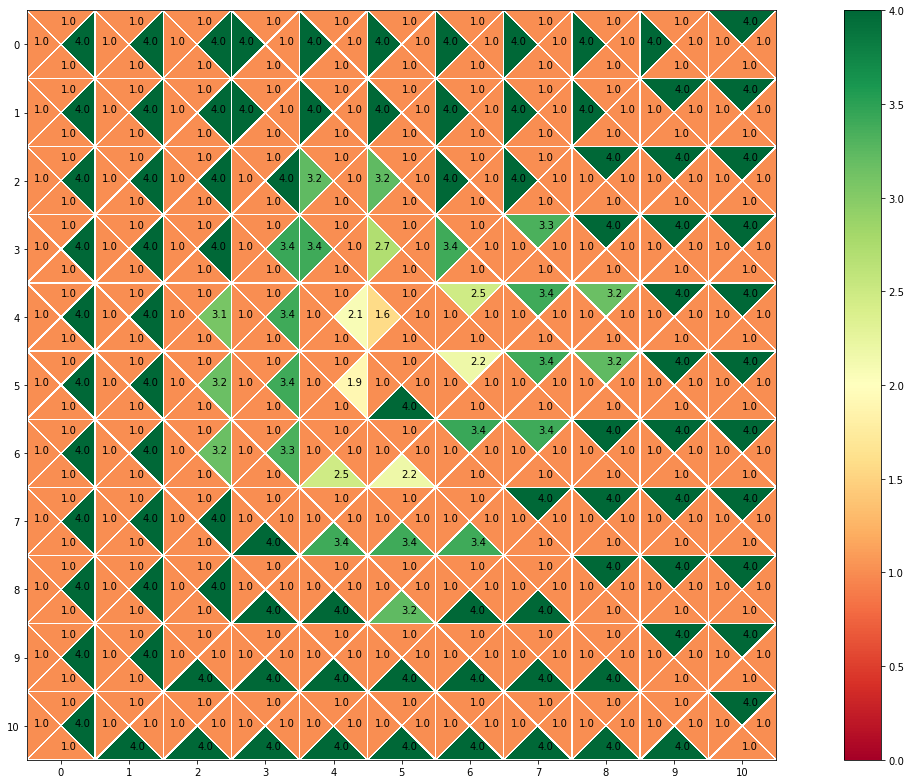

In [33]:
from matplotlib.tri import Triangulation
import numpy as np

def create_demo_data(M, N):
    valuesL = np.ones((11,11))
    valuesR = np.ones((11,11))
    valuesU = np.ones((11,11))
    valuesD = np.ones((11,11))
    
    for key in gain_selection:
        if key[2] == 0:
            array = valuesL
        elif key[2] == 1:
            array = valuesR
        elif key[2] == 2:
            array = valuesU
        elif key[2] == 3:
            array = valuesD
            
        array[int(key[0]*10), int(key[1]*10)] = gain_selection[key]
        
    return [valuesL, valuesR, valuesU, valuesD]

def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesL = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesR = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesU = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesD = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesL, trianglesR, trianglesU, trianglesD]]

M, N = 11, 11  # e.g. 5 columns, 4 rows
values = create_demo_data(M, N)
triangul = triangulation_for_triheatmap(M, N)
# norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots()
fig.set_size_inches(19, 11)

imgs = [ax.tripcolor(t, val.ravel(), cmap='RdYlGn', vmin=0, vmax=4, ec='white')
        for t, val in zip(triangul, values)]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            if dir[1] == -1: 
                ax.text(i + 0.4 * dir[1], j + 0.3 * dir[0], f'{round(v,1)}', color='k')
            elif dir[1] == 1:
                ax.text(i + 0.2 * dir[1], j + 0.3 * dir[0], f'{round(v,1)}', color='k')
            elif dir[1] == 0 and dir[0] == -1:
                ax.text(i , j + 0.3 * dir[0], f'{round(v,1)}', color='k')
            else:
                ax.text(i + 0.3 * dir[1], j + 0.35 * dir[0], f'{round(v,1)}', color='k')
                
cbar = fig.colorbar(imgs[0], ax=ax)

ax.set_xticks(range(M))
ax.set_yticks(range(N))
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells
plt.tight_layout()
plt.show()

In [38]:
def calc_distance(user_loc, target_loc, user_action):
    if user_action == 0: #left
        return int(10*(user_loc[0]-target_loc[0]))
    if user_action == 1: #right
        return int(10*(target_loc[0]-user_loc[0]))
    if user_action == 2: #up
        return int(10*(user_loc[1]-target_loc[1]))
    if user_action == 3: #down
        return int(10*(target_loc[1]-user_loc[1]))
    
distance_gain = {}
reached = 0
for i in tqdm(range(5000)):
#     print('----------------------------------------------------------------------------------')
    env = Environment(num_icons = np.random.randint(low = 3, high = 30))
    env_cell_mapping = give_mapping(env.cells)
    layout = env_cell_mapping[np.newaxis, :, :, np.newaxis]
    done = False
    episode_reward = 0
    start, dest = env.give_start_dest()
    user_state = [start[0], start[1], dest[0], dest[1]]
    prev_steps_assist = []
    prev_steps_assist = give_prev_steps(prev_steps_assist, memory_len)
    step = 0
    episode_reward = 0
    curr_loc = user_state[:2]
    target_loc = user_state[2:]
    
    while not done and step<max_steps:
        
        step+=1
        n_steps+=1
        user_action, user_prob, asst_action, asst_prob, vals, asst_state, asst_output_one_hot\
        = agent.choose_action(user_state, layout, prev_steps_assist, test = True)
        
        dist = calc_distance(user_state[:2], user_state[2:], user_action)
        if dist not in distance_gain:
            distance_gain[dist] = [0,0,0,0]
        distance_gain[dist][asst_action]+=1
        
        new_loc, reward, _, done = env.step(user_action, asst_action + 1, target_loc, curr_loc)
        
        if done:
            reached+=1
         
        user_state = new_loc + target_loc
        prev_steps_assist = asst_state[1:]
        curr_loc = new_loc
        episode_reward+=reward
        
print(reached)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [07:29<00:00, 11.12it/s]

4947


In [39]:
print(distance_gain)

{4: [0, 0, 7, 261], 3: [0, 0, 18, 512], 0: [4527, 3213, 692, 7023], -6: [0, 0, 2, 73], -2: [2, 51, 34, 721], 1: [258, 509, 112, 1463], -1: [276, 519, 115, 1484], -7: [0, 0, 3, 27], -3: [0, 0, 12, 563], 6: [0, 0, 6, 82], -4: [0, 0, 13, 255], 2: [0, 43, 34, 673], 7: [0, 0, 2, 45], 5: [0, 0, 6, 131], -5: [0, 0, 2, 136], 8: [0, 0, 0, 23], -8: [0, 0, 0, 8], 9: [0, 0, 0, 4], -9: [0, 0, 0, 2]}


In [40]:
keys = sorted(list(distance_gain.keys()))